In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = "your/path/here/"

In [13]:
import pandas as pd

df = pd.read_csv(path+"AI_scientists_migration.csv")

print(df.shape)
df.head()

(2579188, 3)


,AID,Year,Country
0,92905,1992.0,United States
1,92905,1993.0,United States
2,92905,1994.0,United States
3,92905,1995.0,United States
4,92905,1996.0,United States


# where are the new AI scientists migrating to China coming from?

In [14]:
ch_migrations = pd.read_csv(path+"Migrations_to_China.csv")

#generate the previous year to see where they were
ch_migrations["prev_year"] = ch_migrations.Year-1
ch_migrations = ch_migrations.rename(columns={"Year":"current_year", "prev_year":"Year"})
ch_migrations.head()

,AID,current_year,Year
0,370007.0,2005.0,2004.0
1,473582.0,2002.0,2001.0
2,1616273.0,1997.0,1996.0
3,2051378.0,1996.0,1995.0
4,2546909.0,2004.0,2003.0


In [15]:
df_ch = ch_migrations.merge(df, on=["AID","Year"], how="left")
df_ch.head()

,AID,current_year,Year,Country
0,370007.0,2005.0,2004.0,NaN
1,473582.0,2002.0,2001.0,NaN
2,1616273.0,1997.0,1996.0,United States
3,2051378.0,1996.0,1995.0,NaN
4,2546909.0,2004.0,2003.0,NaN


In [16]:
# Preparing data for top 20 countries exporting AI scientists to China
df_top20_to_china = df_ch[df_ch.current_year>=2000][["AID","Country"]].dropna().groupby("Country").count().reset_index().sort_values(by="AID", ascending=False).head(20)
df_top20_to_china['Country'] = df_top20_to_china['Country'].replace({'United States':'U.S.','United Kingdom':'U.K.'})
df_top20_to_china

,Country,AID
67,U.S.,2897
22,Hong Kong,1035
66,U.K.,653
51,Singapore,547
1,Australia,495
31,Japan,411
10,Canada,335
18,France,222
19,Germany,171
61,Taiwan,159


In [17]:
to_ch = df_ch[["AID","Year","Country"]].dropna().groupby(["Country","Year"]).count().reset_index().sort_values(by="AID", ascending=False)

In [18]:
to_ch

,Country,Year,AID
610,United States,2019.0,370
609,United States,2018.0,314
608,United States,2017.0,265
607,United States,2016.0,231
605,United States,2014.0,213
...,...,...,...
310,Malaysia,1994.0,1
1,Algeria,2018.0,1
300,Macao,2009.0,1
299,Macao,2007.0,1


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing data for plotting top 5 countries exporting to China over time
us_to_ch = to_ch[to_ch.Country=="United States"].sort_values(by="Year")
hk_to_ch = to_ch[to_ch.Country=="Hong Kong"].sort_values(by="Year")
uk_to_ch = to_ch[to_ch.Country=="United Kingdom"].sort_values(by="Year")
sg_to_ch = to_ch[to_ch.Country=="Singapore"].sort_values(by="Year")
au_to_ch = to_ch[to_ch.Country=="Australia"].sort_values(by="Year")

# where are the new AI scientists migrating to the US coming from?

In [20]:
us_migrations = pd.read_csv(path+"Migrations_to_US.csv")

#generate the previous year to see where they were
us_migrations["prev_year"] = us_migrations.Year-1
us_migrations = us_migrations.rename(columns={"Year":"current_year", "prev_year":"Year"})
print(us_migrations.head())

        AID  current_year    Year
0   92905.0        1992.0  1991.0
1  222893.0        2001.0  2000.0
2  394013.0        2010.0  2009.0
3  442130.0        1999.0  1998.0
4  475755.0        2001.0  2000.0


In [21]:
df_us = us_migrations.merge(df, on=["AID","Year"], how="left")

df_us.AID.nunique()

103874

In [22]:
# Preparing data for top 20 countries exporting AI scientists to US

df_top20_to_us = df_us[df_us.Year>=2000][["AID","Country"]].dropna().groupby("Country").count().reset_index()\
                        .sort_values(by="AID", ascending=False).head(20)

df_top20_to_us['Country'] = df_top20_to_us['Country'].replace({"United Kingdom":"U.K."})
df_top20_to_us

,Country,AID
14,China,5555
12,Canada,1823
28,Germany,1680
34,India,1530
90,U.K.,1514
27,France,792
78,South Korea,766
42,Japan,761
84,Taiwan,733
36,Iran,706


In [23]:

# Preparing data for top 5 countries migrating to the U.S. over time
to_us = df_us[["AID","Year","Country"]].dropna().groupby(["Country","Year"]).count().reset_index().sort_values(by="AID", ascending=False)

ch_to_us = to_us[to_us.Country=="China"].sort_values(by="Year")
ca_to_us = to_us[to_us.Country=="Canada"].sort_values(by="Year")
ge_to_us = to_us[to_us.Country=="Germany"].sort_values(by="Year")
in_to_us = to_us[to_us.Country=="India"].sort_values(by="Year")
uk_to_us = to_us[to_us.Country=="United Kingdom"].sort_values(by="Year")


# extract AI scientists from China migrating to the US (and vice versa) and look at their characteristics

## 1- Age distribution

In [24]:
#calculate the min age of the AI scientist
age = pd.read_csv(path+"AuthorID_FirstPubYear_AIAuthors.csv")
age.columns = ["AID","FirstPubYear"]
age.head()

,AID,FirstPubYear
0,92905,1992.0
1,183422,2002.0
2,222893,2001.0
3,233055,2007.0
4,300656,2004.0


In [26]:
import numpy as np
import seaborn as sns

scientists_from_ch = df_us[(df_us.Country=="China") & (df_us.current_year>=2000)][["AID","current_year"]]
scientists_from_ch = scientists_from_ch.merge(age, on="AID")
scientists_from_ch["AcAge"] = scientists_from_ch.current_year - scientists_from_ch.FirstPubYear

scientists_from_us = df_ch[(df_ch.Country=="United States") & (df_ch.current_year>=2000)][["AID","current_year"]]
scientists_from_us = scientists_from_us.merge(age, on="AID")
scientists_from_us["AcAge"] = scientists_from_us.current_year - scientists_from_us.FirstPubYear

scientists_from_ch.head()

,AID,current_year,FirstPubYear,AcAge
0,9988965.0,2020.0,1989.0,31.0
1,36755269.0,2005.0,2003.0,2.0
2,44738307.0,2021.0,2011.0,10.0
3,45681779.0,2015.0,2012.0,3.0
4,211679057.0,2006.0,2000.0,6.0


In [27]:
scientists_from_us.head()

,AID,current_year,FirstPubYear,AcAge
0,44738307.0,2019.0,2011.0,8.0
1,45681779.0,2018.0,2012.0,6.0
2,66820806.0,2019.0,1998.0,21.0
3,113895120.0,2015.0,1996.0,19.0
4,137861795.0,2019.0,2006.0,13.0


## 2- Impact

In [28]:
#calculate average c2 of each scientist
cit = pd.read_csv(path+"Papers_C2_nozeros.csv")

impact = pd.read_csv(path+"PaperAuthorAffPubYearCountry_AIAuthors.csv", usecols=['AuthorID','PID'])

impact.columns = ['AID','PID']

impact = impact.merge(cit, on="PID", how="left")
impact = impact.fillna(0)

impact = impact[['AID','c_2']].groupby('AID').mean().reset_index()

impact.head()

,AID,c_2
0,92905,5.996283
1,183422,5.666667
2,222893,6.653595
3,233055,5.025862
4,300656,0.666667


In [29]:
import numpy as np
import seaborn as sns

scientists_from_ch_impact = df_us[(df_us.Country=="China") & (df_us.current_year>=2000)][["AID","current_year"]]
scientists_from_ch_impact = scientists_from_ch_impact.merge(impact, on="AID")

scientists_from_us_impact = df_ch[(df_ch.Country=="United States") & (df_ch.current_year>=2000)][["AID","current_year"]]
scientists_from_us_impact = scientists_from_us_impact.merge(impact, on="AID")

## 3- Productivity

In [30]:
#calculate the productivity of each scientist

papers = pd.read_csv(path+"/PaperAuthorAffPubYearCountry_AIAuthors.csv", usecols=['AuthorID','PID'])
papers.columns = ['AID','PID']

papers = papers[['AID','PID']].groupby('AID').count().reset_index().rename(columns={'PID':'productivity'})

papers.head()

,AID,productivity
0,92905,269
1,183422,6
2,222893,153
3,233055,116
4,300656,3


In [31]:
import numpy as np
import seaborn as sns

scientists_from_ch_prod = df_us[(df_us.Country=="China") & (df_us.current_year>=2000)][["AID","current_year"]]
scientists_from_ch_prod = scientists_from_ch_prod.merge(papers, on="AID")

scientists_from_us_prod = df_ch[(df_ch.Country=="United States") & (df_ch.current_year>=2000)][["AID","current_year"]]
scientists_from_us_prod = scientists_from_us_prod.merge(papers, on="AID")

## Plotting number of AI scientists migrating to the US and to China separately

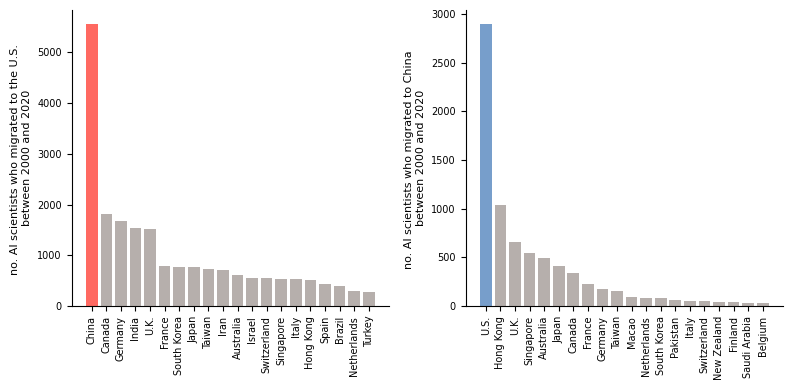

In [32]:
us_color = '#779ECB'#'#829460'
china_color = '#FF6961'#'#E98EAD'
other_color = '#B6AFAC'#'#8B7E74'#'#4472c4'

plt.rcParams["figure.figsize"] = (8.03,4)


fig = plt.figure()

tickfontsize = 7
labelfontsize = 8
subtitlefontsize = 8
panellabelsize = 9

gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[:, :1])
ax2 = fig.add_subplot(gs[:, 1:])
#ax8 = fig.add_subplot(gs[6:, :])

ax1.bar(df_top20_to_us['Country'],height=df_top20_to_us['AID'],
         color=[china_color] + [other_color] * 19)

ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(labelsize=tickfontsize)

ax1.set_ylabel('no. AI scientists who migrated to the U.S. \nbetween 2000 and 2020', fontsize=subtitlefontsize)

ax2.bar(df_top20_to_china['Country'],height=df_top20_to_china['AID'],
         color=[us_color] + [other_color] * 19)

ax2.tick_params(axis='x', rotation=90)
ax2.tick_params(labelsize=tickfontsize)


ax2.set_ylabel('no. AI scientists who migrated to China \nbetween 2000 and 2020', fontsize=subtitlefontsize)


ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.show()

## Plotting spatio-temporal migration trend separately

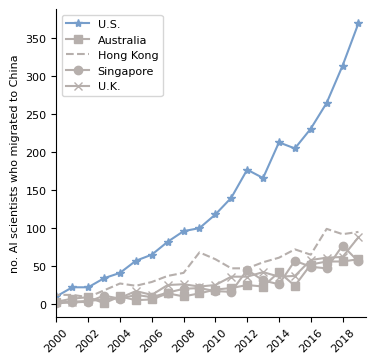

In [33]:
plt.rcParams["figure.figsize"] = (4,4)

fig, ax = plt.subplots()

tickfontsize = 7
labelfontsize = 8
subtitlefontsize = 8
panellabelsize = 9

year_end = 2019
us_to_ch = us_to_ch[us_to_ch.Year.le(year_end)]
au_to_ch = au_to_ch[au_to_ch.Year.le(year_end)]
hk_to_ch = hk_to_ch[hk_to_ch.Year.le(year_end)]
sg_to_ch = sg_to_ch[sg_to_ch.Year.le(year_end)]
uk_to_ch = uk_to_ch[uk_to_ch.Year.le(year_end)]

ax.plot(us_to_ch.Year, us_to_ch.AID, '*-', label="U.S.", color=us_color)
ax.plot(au_to_ch.Year, au_to_ch.AID, 's-', label="Australia", color= other_color)
ax.plot(hk_to_ch.Year, hk_to_ch.AID, '--', label="Hong Kong", color=other_color)
ax.plot(sg_to_ch.Year, sg_to_ch.AID, 'o-', label="Singapore", color=other_color)
ax.plot(uk_to_ch.Year, uk_to_ch.AID, 'x-', label="U.K.", color=other_color)

xticks = [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=labelfontsize)
ax.set_xlim(2000,2019.5)
ax.tick_params(labelsize=labelfontsize)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel("no. AI scientists who migrated to China",
                fontsize=subtitlefontsize)

ax.legend(fontsize=labelfontsize)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

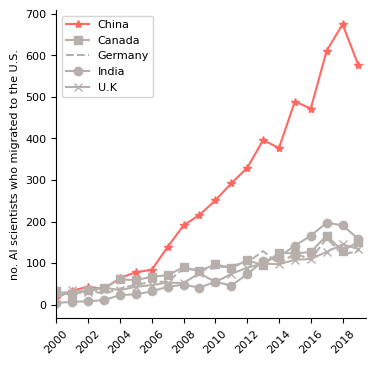

In [34]:
plt.rcParams["figure.figsize"] = (4,4)

fig, ax = plt.subplots()

tickfontsize = 7
labelfontsize = 8
subtitlefontsize = 8
panellabelsize = 9

year_end = 2019
ch_to_us = ch_to_us[ch_to_us.Year.le(year_end)]
ca_to_us = ca_to_us[ca_to_us.Year.le(year_end)]
ge_to_us = ge_to_us[ge_to_us.Year.le(year_end)]
in_to_us = in_to_us[in_to_us.Year.le(year_end)]
uk_to_us = uk_to_us[uk_to_us.Year.le(year_end)]

ax.plot(ch_to_us.Year, ch_to_us.AID, '*-', label="China", color=china_color)
ax.plot(ca_to_us.Year, ca_to_us.AID, 's-', label="Canada", color=other_color)
ax.plot(ge_to_us.Year, ge_to_us.AID, '--', label="Germany", color=other_color)
ax.plot(in_to_us.Year, in_to_us.AID, 'o-', label="India", color=other_color)
ax.plot(uk_to_us.Year, uk_to_us.AID, 'x-', label="U.K", color=other_color)

xticks = [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=labelfontsize)
ax.set_xlim(2000,2019.5)
ax.tick_params(labelsize=labelfontsize)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel("no. AI scientists who migrated to the U.S.",
                fontsize=subtitlefontsize)

ax.legend(fontsize=labelfontsize)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Plotting box plots for difference in treatment and control separately

In [37]:
# Loading relevant files

to_ch_control = pd.read_csv(path+"/us_to_ch_control2.csv").rename(columns={'control_US_collab':'perc_US_collab'})
to_ch_treatment = pd.read_csv(path+"/us_to_ch_treatment2.csv").rename(columns={'treatment_US_collab':'perc_US_collab'})

to_us_control = pd.read_csv(path+"/ch_to_us_control2.csv").rename(columns={'control_Ch_collab':'perc_Ch_collab'})
to_us_treatment = pd.read_csv(path+"/ch_to_us_treatment2.csv").rename(columns={'treatment_Ch_collab':'perc_Ch_collab'})

to_ch_treatment.head()

# Computing academic age

def compute_careerage(dfi):
    dfi['AcAge'] = dfi['move_year'] - dfi['FirstPubYear']
    return dfi

to_ch_control = compute_careerage(to_ch_control)
to_ch_treatment = compute_careerage(to_ch_treatment)

to_us_control = compute_careerage(to_us_control)
to_us_treatment = compute_careerage(to_us_treatment)

to_us_treatment.head()

,treatment_AID,move_year,FirstPubYear,productivity_beforemove,productivity_bin,avgc2_beforemove,avgc2_bin,perc_Ch_collab,AcAge
0,9988965.0,2020.0,1989.0,437,16.0,13.070938,18.0,0.267606,31.0
1,36755269.0,2005.0,2003.0,4,2.0,9.250000,16.0,0.043478,2.0
2,44738307.0,2021.0,2011.0,99,16.0,13.939394,18.0,0.571429,10.0
3,45681779.0,2015.0,2012.0,3,1.0,2.666667,7.0,1.000000,3.0
4,119474622.0,1999.0,1971.0,82,16.0,2.695122,7.0,0.000000,28.0


In [38]:
def plotPvalue(ax, x, y, pVal, gap, lw=0.2, c='black'):
    """
    This function will be used to plot the p-values.
    """

    height = max(y[0], y[1])

    handles_y0 = height + gap[0]
    handles_y1 = height + gap[1]

    ax.hlines(handles_y1, x[0], x[1], color=c, lw=lw)
    ax.vlines(x[0], handles_y0, handles_y1, color=c, lw=lw)
    ax.vlines(x[1], handles_y0, handles_y1, color=c, lw=lw)

    stars = '***' if pVal < 0.001 else '**' if pVal < 0.01 else '*' if pVal < 0.05 else f'p={round(pVal, 2)}'
    offset = 0.01 if pVal < 0.05 else 0.04

    ax.text((x[0] + x[1])/2, handles_y1+0.25, stars, ha='center', color=c)

Plotting Career Age
Line2D(_child6)
p value to us: 0.0
p value to china: 0.0
Plotting Impact
p value to us: 1.632162660292189e-35
p value to china: 1.9290873874984279e-47
Plotting productivity
p value to us: 3.6839642388443196e-103
p value to china: 1.82001552248533e-109


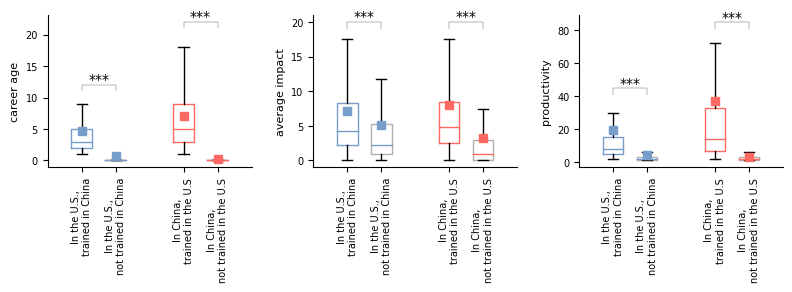

In [39]:
import matplotlib.pyplot as plt

us_color = '#779ECB'#'#829460'
china_color = '#FF6961'#'#E98EAD'
other_color = '#B6AFAC'#'#8B7E74'#'#4472c4'

#plt.rcParams["figure.figsize"] = (22,15)
plt.rcParams["figure.figsize"] = (8.03,3)


fig = plt.figure()

tickfontsize = 7
labelfontsize = 8
subtitlefontsize = 8
panellabelsize = 9

gs = fig.add_gridspec(1,3)
ax1 = fig.add_subplot(gs[:, :1])
ax2 = fig.add_subplot(gs[:, 1:2])
ax3 = fig.add_subplot(gs[:, 2:])

# Create the box plots with different box props
# Define the box props for the two box plots

linewidth = 1
width = 0.30

bp_us = dict(color=us_color, linestyle='-', linewidth=linewidth)
bp_not = dict(color=other_color, linestyle='-', linewidth=linewidth)

bp_china = dict(color=china_color, linestyle='-', linewidth=linewidth)

# median props
mp_us = dict(linestyle='-', linewidth=linewidth, color=us_color)
mp_china = dict(linestyle='-', linewidth=linewidth, color=china_color)

# mean props
mep_us = dict(marker='s', markerfacecolor=us_color, markeredgecolor=us_color)
mep_china = dict(marker='s', markerfacecolor=china_color, markeredgecolor=china_color)

#mep_us = dict(marker='_', markerfacecolor=us_color, markeredgecolor=us_color)
#mep_china = dict(marker='_', markerfacecolor=china_color, markeredgecolor=china_color)

position_us = [0.5,1]
position_china = [2,2.5]

age_column = 'AcAge'
prod_column = 'productivity_beforemove'
impact_column = 'avgc2_beforemove'

################################
################################
#Plotting boxplots for career age
################################
################################

print("Plotting Career Age")
bp_age_tous = ax1.boxplot(to_us_treatment[age_column], positions=[position_us[0]], labels=['In the U.S.,\ntrained in China'],
            boxprops=bp_us, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)

ax1.boxplot(to_us_control[age_column], positions=[position_us[1]], labels=['In the U.S.,\nnot trained in China'],
            boxprops=bp_not, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)


print(bp_age_tous['means'][0])

ax1.boxplot(to_ch_treatment[age_column], positions=[position_china[0]], labels=['In China,\ntrained in the U.S'],
            boxprops=bp_china, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

ax1.boxplot(to_ch_control[age_column], positions=[position_china[1]], labels=['In China,\nnot trained in the U.S'],
            boxprops=bp_not, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

# perform a t-test assuming unequal variances between the two groups

from scipy.stats import ttest_ind

_, p_tous = ttest_ind(to_us_treatment[age_column],
                         to_us_control[age_column], equal_var=False)

_, p_tochina = ttest_ind(to_ch_treatment[age_column],
                         to_ch_control[age_column], equal_var=False)


print("p value to us:",p_tous)

print("p value to china:",p_tochina)


plotPvalue(ax1, position_us, [10,3], p_tous, [1,2], lw=0.2, c='black')
plotPvalue(ax1, position_china, [20,3], p_tochina, [1,2], lw=0.2, c='black')


ax1.tick_params(labelsize=tickfontsize)

ax1.tick_params(axis='x',rotation=90)

ax1.set_ylabel("career age",
                fontsize=subtitlefontsize)

################################
################################
# Plotting boxplots for average impact
################################
################################

print("Plotting Impact")
ax2.boxplot(to_us_treatment[impact_column], positions=[position_us[0]], labels=['In the U.S.,\ntrained in China'],
            boxprops=bp_us, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)

ax2.boxplot(to_us_control[impact_column], positions=[position_us[1]], labels=['In the U.S.,\nnot trained in China'],
            boxprops=bp_not, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)

ax2.boxplot(to_ch_treatment[impact_column], positions=[position_china[0]], labels=['In China,\ntrained in the U.S'],
            boxprops=bp_china, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

ax2.boxplot(to_ch_control[impact_column], positions=[position_china[1]], labels=['In China,\nnot trained in the U.S'],
            boxprops=bp_not, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

# perform a t-test assuming unequal variances between the two groups

from scipy.stats import ttest_ind

_, p_tous = ttest_ind(to_us_treatment[impact_column],
                         to_us_control[impact_column], equal_var=False)

_, p_tochina = ttest_ind(to_ch_treatment[impact_column],
                         to_ch_control[impact_column], equal_var=False)


print("p value to us:",p_tous)

print("p value to china:",p_tochina)


plotPvalue(ax2, position_us, [18,12], p_tous, [1,2], lw=0.2, c='black')
plotPvalue(ax2, position_china, [18,10], p_tochina, [1,2], lw=0.2, c='black')

ax2.tick_params(labelsize=tickfontsize)

ax2.tick_params(axis='x',rotation=90)

ax2.set_ylabel("average impact",
                fontsize=subtitlefontsize)

################################
################################
# Plotting boxplots for productivity
################################
################################

print("Plotting productivity")
ax3.boxplot(to_us_treatment[prod_column], positions=[position_us[0]], labels=['In the U.S.,\ntrained in China'],
            boxprops=bp_us, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)

ax3.boxplot(to_us_control[prod_column], positions=[position_us[1]], labels=['In the U.S.,\nnot trained in China'],
            boxprops=bp_not, medianprops=mp_us, showfliers=False, showmeans=True,
            meanprops=mep_us, widths=width)

ax3.boxplot(to_ch_treatment[prod_column], positions=[position_china[0]], labels=['In China,\ntrained in the U.S'],
            boxprops=bp_china, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

ax3.boxplot(to_ch_control[prod_column], positions=[position_china[1]], labels=['In China,\nnot trained in the U.S'],
            boxprops=bp_not, medianprops=mp_china, showfliers=False, showmeans=True,
            meanprops=mep_china, widths=width)

# perform a t-test assuming unequal variances between the two groups

from scipy.stats import ttest_ind

_, p_tous = ttest_ind(to_us_treatment[prod_column],
                         to_us_control[prod_column], equal_var=False)

_, p_tochina = ttest_ind(to_ch_treatment[prod_column],
                         to_ch_control[prod_column], equal_var=False)


print("p value to us:",p_tous)

print("p value to china:",p_tochina)


plotPvalue(ax3, position_us, [40,10], p_tous, [1,5], lw=0.2, c='black')
plotPvalue(ax3, position_china, [80,10], p_tochina, [1,5], lw=0.2, c='black')

ax3.tick_params(labelsize=tickfontsize)

ax3.tick_params(axis='x',rotation=90)

ax3.set_ylabel("productivity",
                fontsize=subtitlefontsize)

################################
################################
################################
################################

ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.show()